In [52]:
%matplotlib inline

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
from pandas_datareader import data

import datetime

In [55]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [32]:
date.strftime("%A")

'Saturday'

In [33]:
date + pd.to_timedelta(np.arange(12), "D")

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas Time Series: Indexing by Time

In [34]:
index = pd.DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'])
df_data = pd.Series(np.arange(12), index)
df_data

2015-07-04     0
2015-07-05     1
2015-07-06     2
2015-07-07     3
2015-07-08     4
2015-07-09     5
2015-07-10     6
2015-07-11     7
2015-07-12     8
2015-07-13     9
2015-07-14    10
2015-07-15    11
dtype: int32

In [35]:
df_data['2015-07-04':'2015-07-10']

2015-07-04    0
2015-07-05    1
2015-07-06    2
2015-07-07    3
2015-07-08    4
2015-07-09    5
2015-07-10    6
dtype: int32

For time stamps, Pandas provides the Timestamp type. It is essentially a replacement for Python's native datetime, but is based on the more efficient numpy.datetime64 data type. The associated Index structure is **DatetimeIndex**.

For time Periods, Pandas provides the Period type. This encodes a fixed-frequency interval based on numpy.datetime64. The associated index structure is **PeriodIndex**.

For time deltas or durations, Pandas provides the Timedelta type. Timedelta is a more efficient replacement for Python's native datetime.timedelta type, and is based on numpy.timedelta64. The associated index structure is **TimedeltaIndex**.

pd.to_datetime() function can parse a wide variety of formats. Passing a single date to pd.to_datetime() yields a Timestamp; passing a series of dates by default yields a DatetimeIndex

In [36]:
dates = pd.to_datetime([datetime.date(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

DatetimeIndex can be converted to a PeriodIndex with the to_period() function with the addition of a frequency code; here we'll use 'D' to indicate daily frequency

In [37]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

TimedeltaIndex is created when a date is subtracted from another

In [38]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

Regular sequences: pd.date_range() for timestamps, pd.period_range() for periods, and pd.timedelta_range() for time deltas

pd.date_range() accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates. By default, the frequency is one day

In [39]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [40]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [41]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [42]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [43]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### Frequencies and Offsets

| Code 	|-| Code Description     	|
|------	|-|:------------------------|
|D  	|-| Calendar day         	|
| B    	|-| Business day         	|
| W    	|-| Weekly               	|
| M    	|-| Month end            	|
| BM   	|-| Business month end   	|
| Q    	|-| Quarter end          	|
| BQ   	|-| Business quarter end 	|
| A    	|-| Year end             	|
| BA   	|-| Business year end    	|
| H    	|-| Hours                	|
| BH   	|-| Business hours       	|
| T    	|-| Minutes              	|
| S    	|-| Seconds              	|
| L    	|-| Milliseonds          	|
| U    	|-| Microseconds         	|
| N    	|-| nanoseconds          	|
| MS  	|-|Month start            	|
| QS  	|-|Quarter start          	|
| AS  	|-|Year start             	|
| BMS 	|-|Business month start   	|
| BQS 	|-|Business quarter start 	|
| BAS 	|-|Business year start    	|

On top of this, codes can be combined with numbers to specify other frequencies. For example, for a frequency of 2 hours 30 minutes, we can combine the hour (H) and minute (T)

In [44]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [45]:
pd.date_range('2015-07-01', periods=10, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-13', '2015-07-14'],
              dtype='datetime64[ns]', freq='B')

### Resampling, Shifting, and Windowing

In [48]:
goog = data.DataReader("GOOG", data_source='yahoo', start="2004", end="2020")

In [50]:
goog.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,1350.260010,1342.780029,1348.500000,1343.560059,347500.0,1343.560059
2019-12-26,1361.327026,1344.469971,1346.170044,1360.400024,667500.0,1360.400024
2019-12-27,1364.530029,1349.310059,1362.989990,1351.890015,1038400.0,1351.890015
2019-12-30,1353.000000,1334.020020,1350.000000,1336.140015,1050900.0,1336.140015
2019-12-31,1338.000000,1329.084961,1330.109985,1337.020020,961800.0,1337.020020


In [51]:
goog = goog['Close']

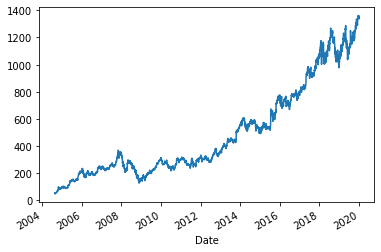

In [57]:
goog.plot()

### Resampling and converting frequencies

Resampling at a higher or lower frequency. This can be done using the resample() method, or the much simpler asfreq() method. The primary difference between the two is that resample() is fundamentally a data aggregation, while asfreq() is fundamentally a data selection.

The difference: at each point, resample reports the average of the previous year, while asfreq reports the value at the end of the year

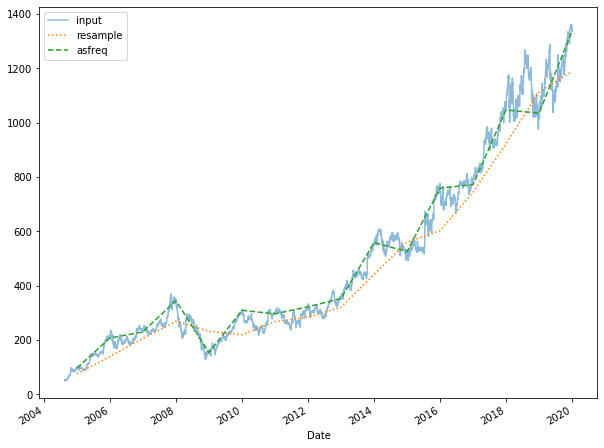

In [70]:
goog.plot(alpha=0.5, style='-', figsize=(10, 8))
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

Just as with the pd.fillna() function discussed previously, asfreq() accepts a method argument to specify how values are imputed. Example: resample the business day data at a daily frequency (i.e., including weekends)

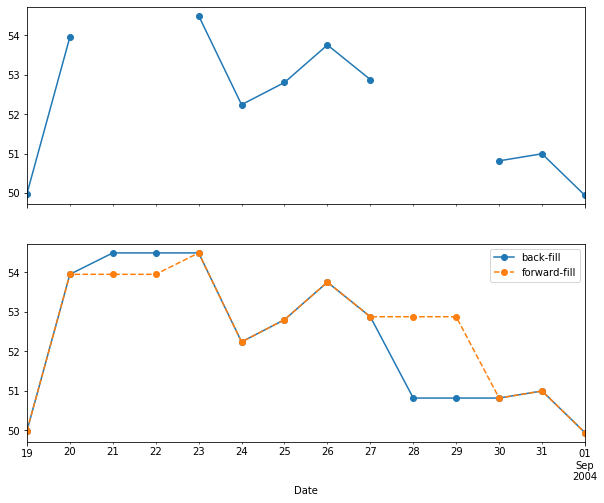

In [69]:
fig, ax = plt.subplots(2, figsize=(10, 8), sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"])

### Time-shifts

Common time series-specific operation is shifting of data in time. Pandas has two closely related methods for computing this: shift() and tshift() In short, the difference between them is that shift() shifts the data, while tshift() shifts the index. In both cases, the shift is specified in multiples of the frequency.

Example: both shift() and tshift() by 900 days

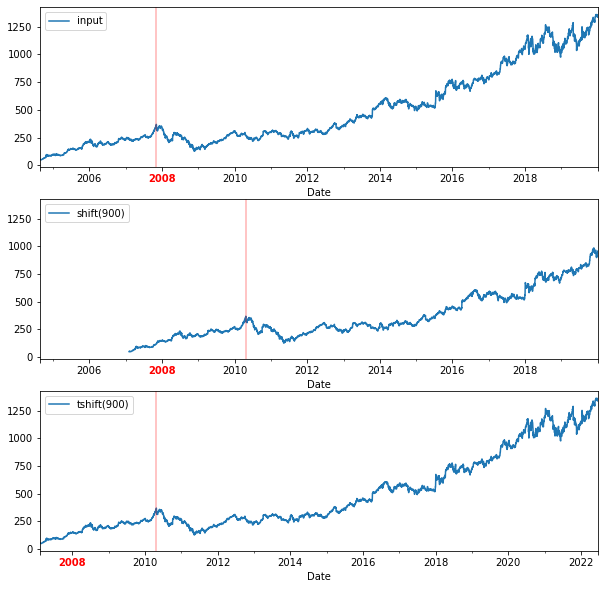

In [71]:
fig, ax = plt.subplots(3, sharey=True, figsize=(10, 10))

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

A common context for this type of shift is in computing differences over time. Example: use shifted values to compute the one-year return on investment for Google stock over the course of the dataset

Text(0, 0.5, '% Return on Investment')

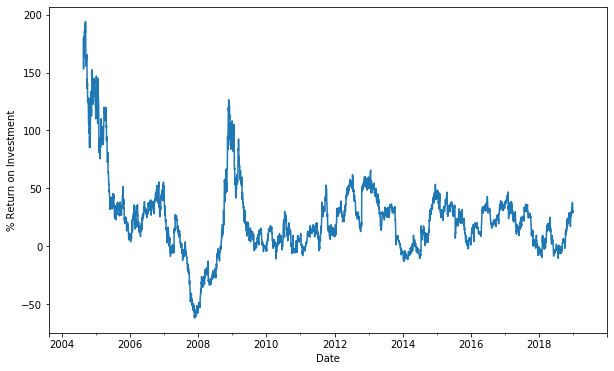

In [76]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot(figsize=(10, 6))
plt.ylabel('% Return on Investment')

### Rolling windows

Rolling statistics are a third type of time series-specific operation implemented by Pandas. These can be accomplished via the rolling() attribute of Series and DataFrame objects. This rolling view makes available a number of aggregation operations by default.

Example: the one-year centered rolling mean and standard deviation of the Google stock prices:


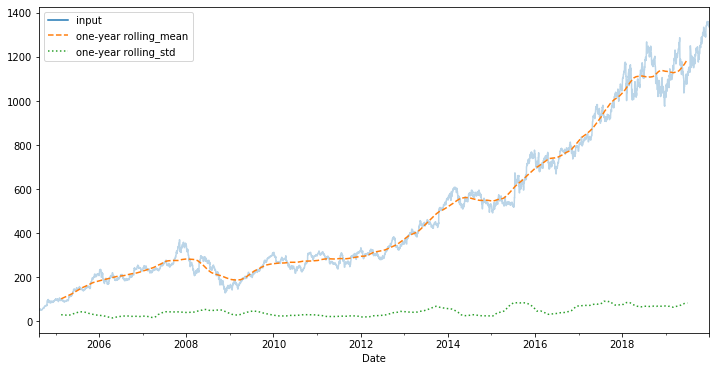

In [78]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'], figsize=(12, 6))
ax.lines[0].set_alpha(0.3)